In [2]:
# Step 1: Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# Step 2: Load dataset
df = pd.read_csv("C:/Users/talib/churn-project/data/Telco-Customer-Churn.csv")

In [12]:
# Step 3: Basic info
df.shape    

(7043, 21)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [15]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Step 4: Check spaces in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

Missing TotalCharges: 11


In [17]:
# Drop missing rows in TotalCharges
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

In [18]:
# Drop customerID
df = df.drop(columns=['customerID'])

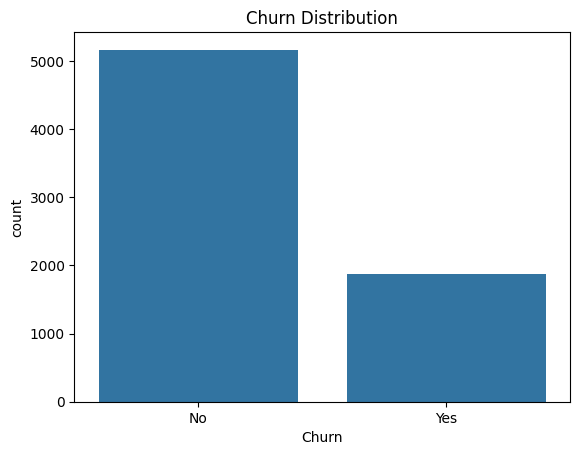


Churn %:
Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


In [19]:
# Step 5: Target distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

print("\nChurn %:")
print(df['Churn'].value_counts(normalize=True))

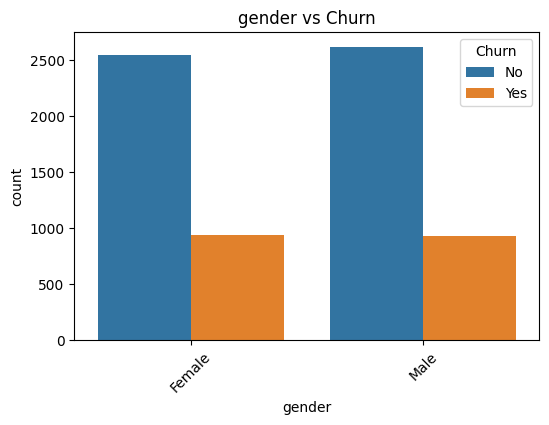

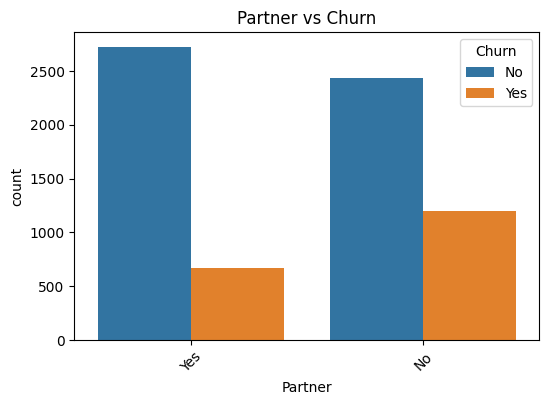

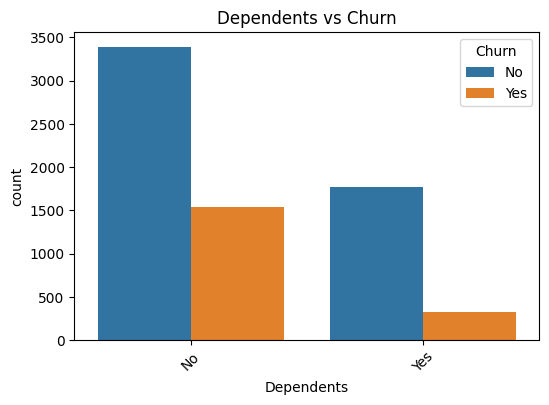

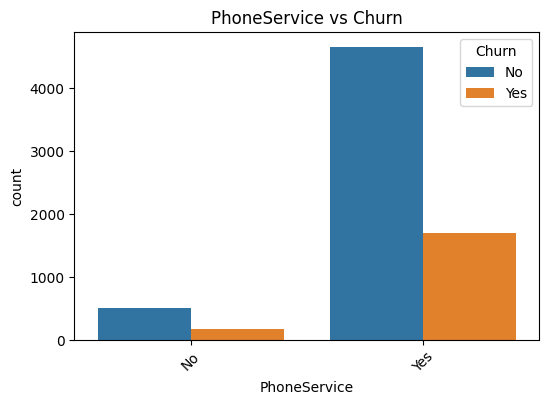

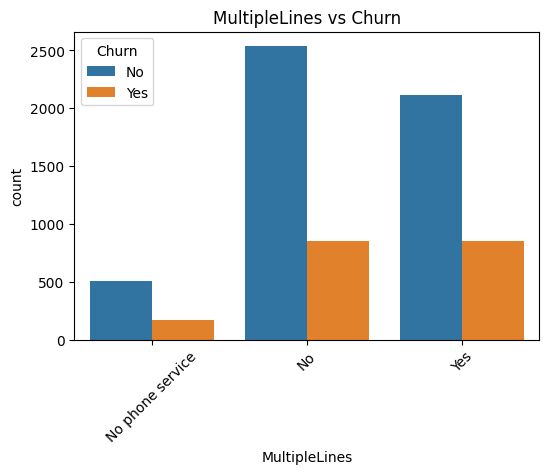

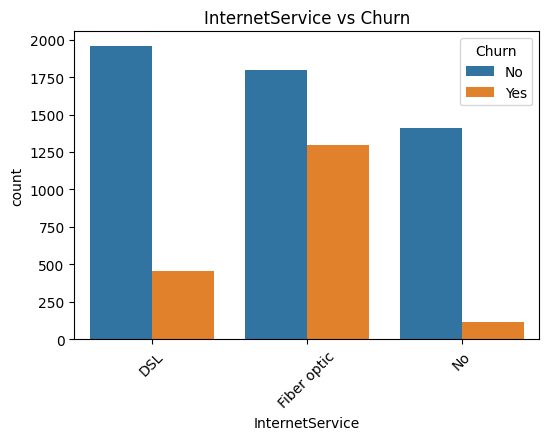

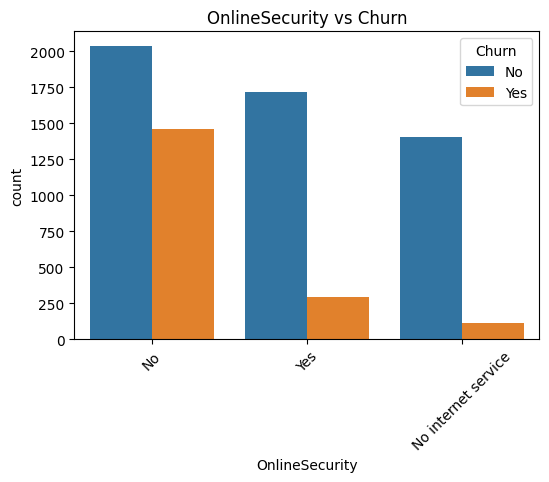

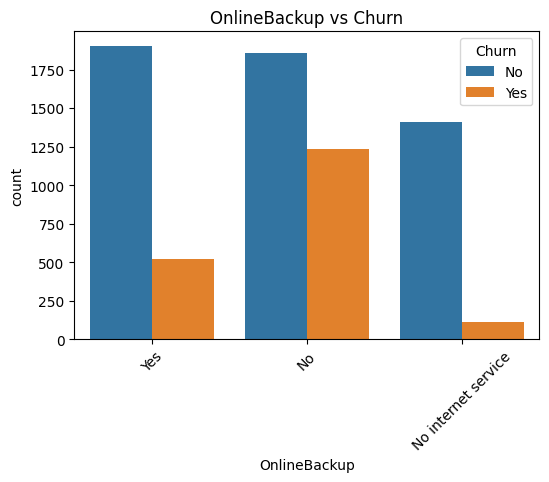

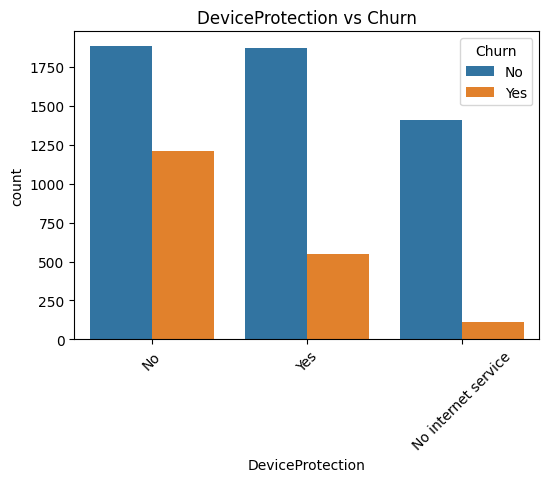

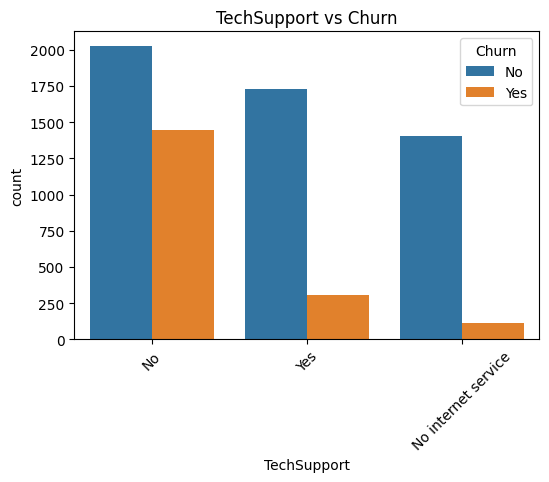

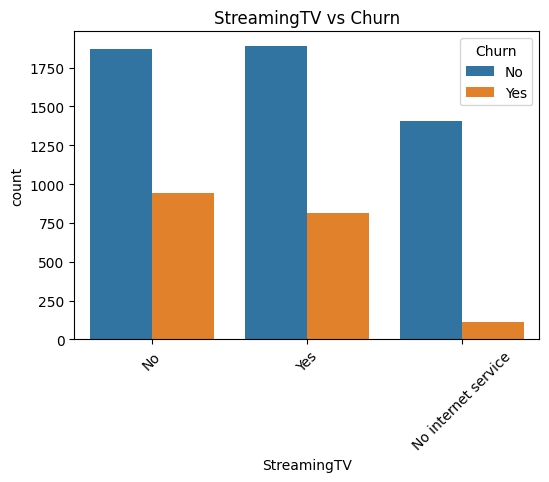

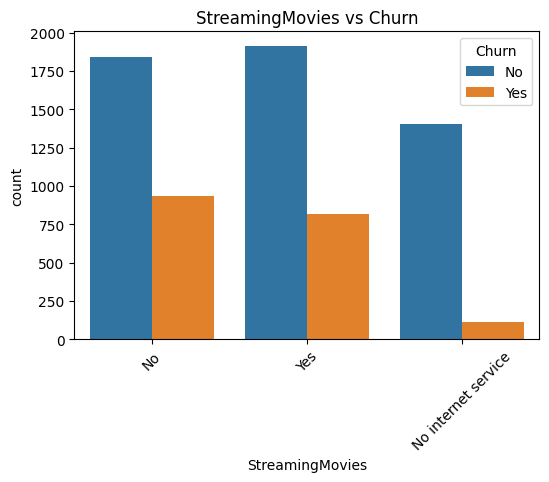

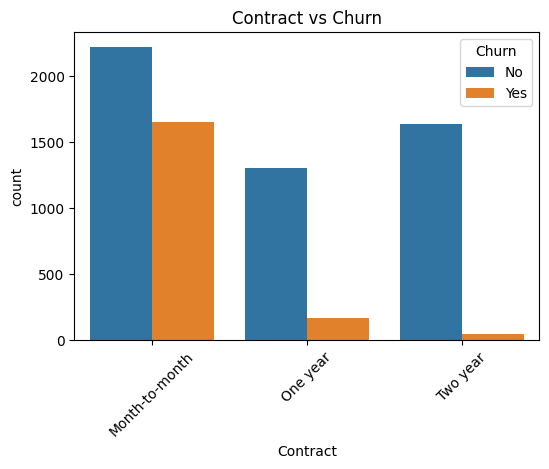

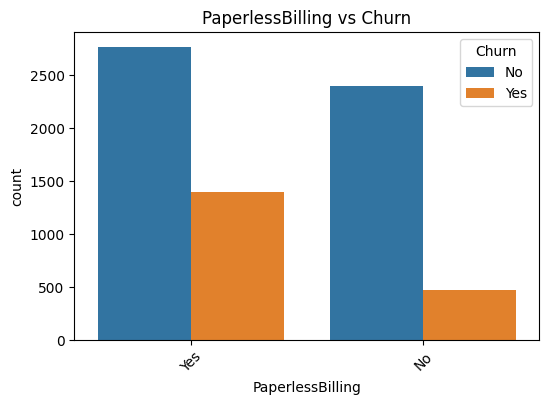

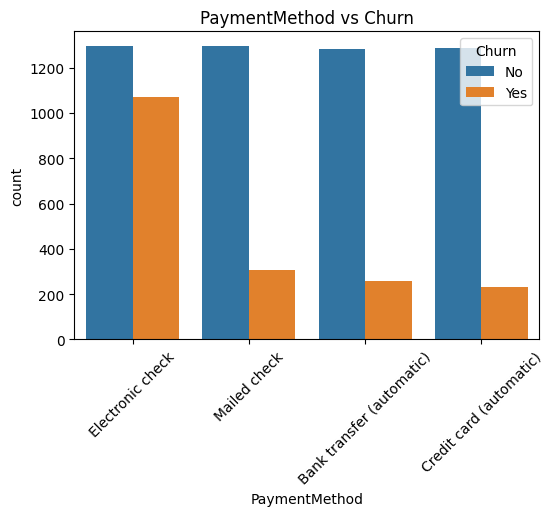

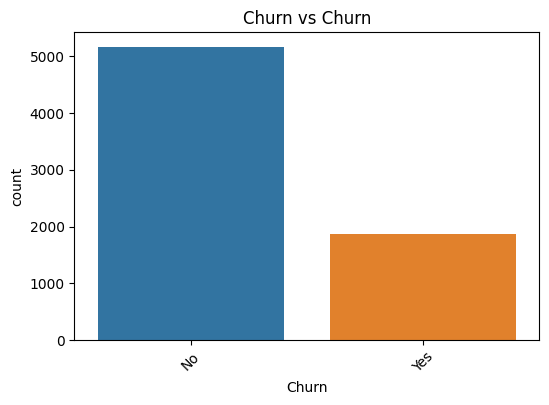

In [20]:
# Step 6: Categorical column analysis
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

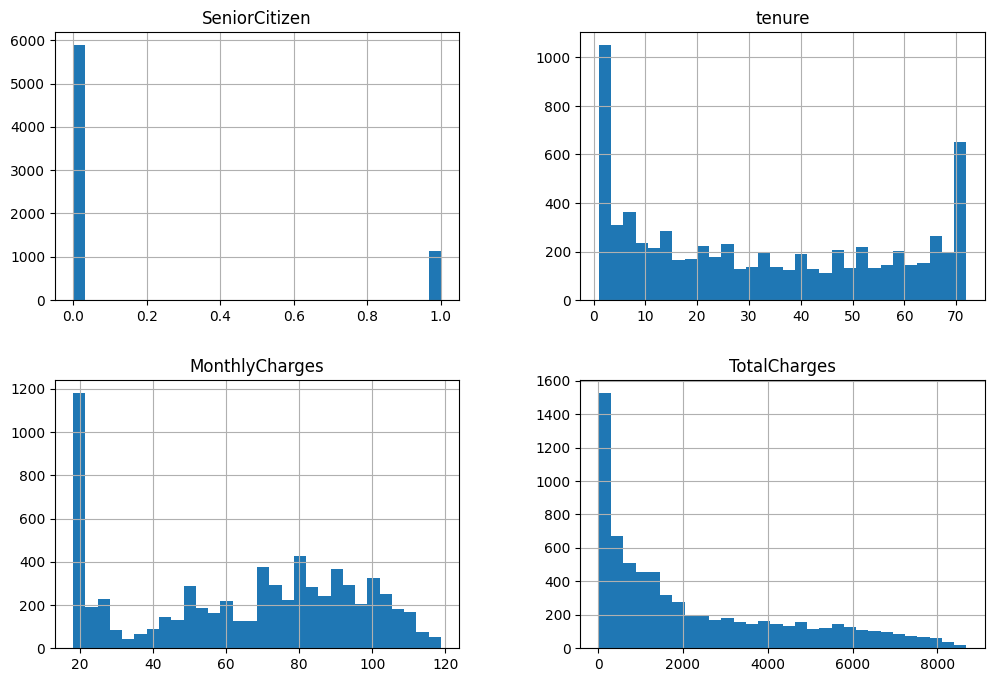

In [21]:

# Step 7: Numerical column analysis
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[numerical_cols].hist(bins=30, figsize=(12,8))
plt.show()

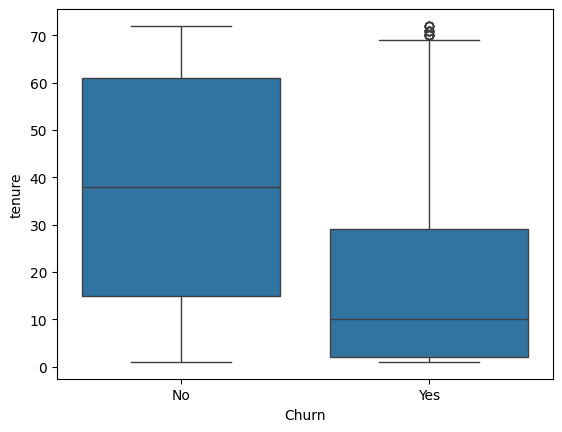

In [22]:

# Step 8: Tenure vs churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


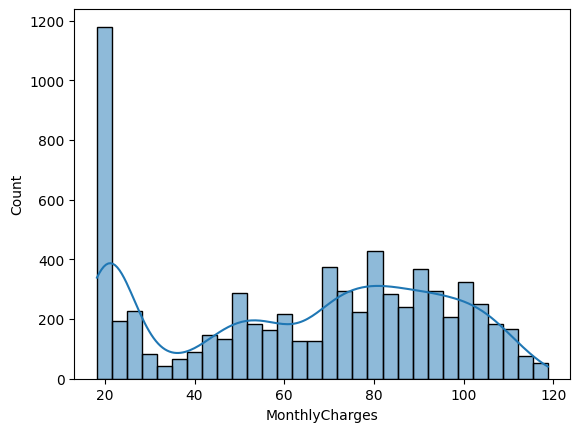

In [23]:
# Step 9: MonthlyCharges distribution
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.show()

In [24]:
# Step 10: Feature Engineering Examples
# Average charges per month
df['avg_charges'] = df['TotalCharges'] / df['tenure'].replace(0,1)


In [25]:
# Binary encode Yes/No
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for c in binary_cols:
    df[c] = df[c].map({'Yes':1,'No':0})

In [26]:
# Tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,100],
                            labels=['0-12','13-24','25-48','49-60','60+'])

display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,avg_charges,tenure_group
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,29.850000,0-12
1,Male,0,0,0,34,1,No,DSL,Yes,No,...,No,No,One year,0,Mailed check,56.95,1889.50,No,55.573529,25-48
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,54.075000,0-12
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,...,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,40.905556,25-48
4,Female,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,75.825000,0-12
